<a href="https://colab.research.google.com/github/gurram46/Multi-Linear-Regression/blob/main/Multi_Linear_Regression_ToyotaCorolla__Data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Data Preprocessing

In [ ]:
cars=pd.read_csv('ToyotaCorolla - MLR.csv')

In [ ]:
cars.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


converting categrocal columns to dummy variables

In [ ]:
cars=pd.get_dummies(cars, drop_first=True)

In [ ]:
cars.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0
Weight,0


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

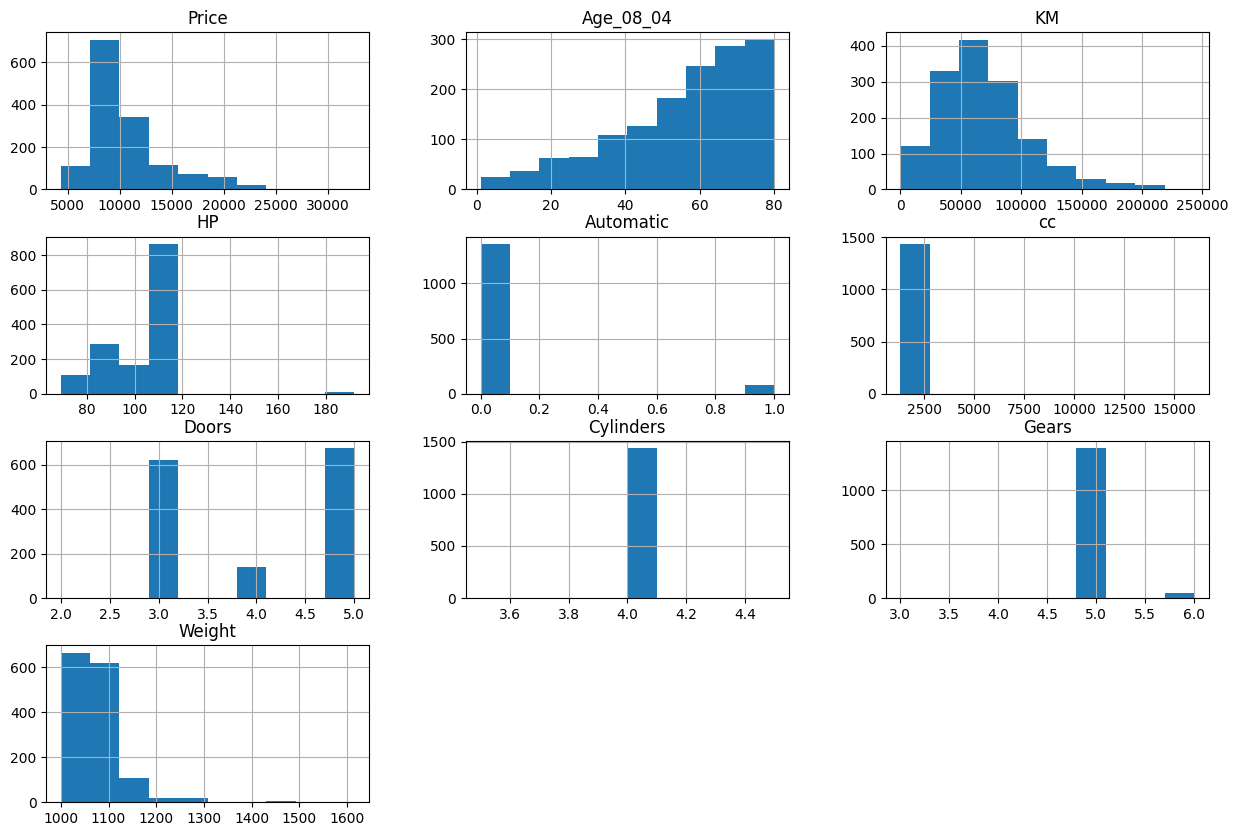

In [ ]:
cars.hist(bins=10, figsize=(15,10))

In [ ]:
corr_matrix=cars.corr()
corr_matrix

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.568087,-0.560470


In the above correleation matrix table there are several NaN values for the Cylinders column.

In [ ]:
cars['Cylinders'].unique()
cars['Cylinders'].isnull().sum()

0

From the above code we understand that cylinder dose not have any any missing values

In [ ]:
cars=cars.drop(columns=['Cylinders'])

In [ ]:
corr_matrix=cars.corr()
cars.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618,0.025495,-0.027589
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000,0.568087,-0.560470
Fuel_Type_Diesel,0.054084,-0.097740,0.403060,-0.533453,-0.084490,0.327723,0.025495,-0.048847,0.568087,1.000000,-0.942976


After droping the Cylinder column now correleation matrix is free of NAN values

<Axes: >

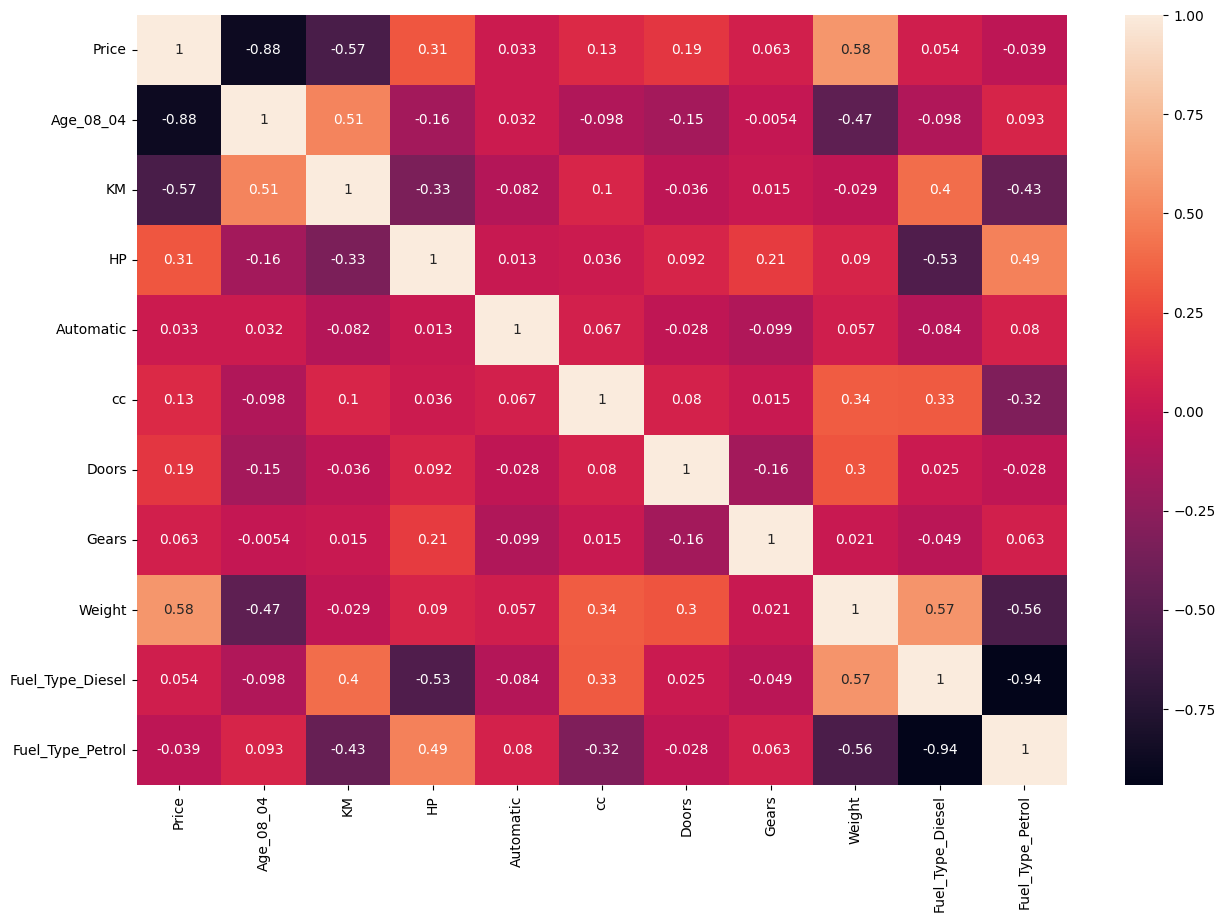

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)

Price has:

A strong negative correlation with Age_08_04 (-0.877), indicating that as the car's age increases, the price decreases.

A moderate positive correlation with Weight (0.581), suggesting heavier cars tend to have higher prices.

A moderate negative correlation with KM (-0.570), showing that cars with higher kilometers traveled tend to have lower prices

Text(0.5, 1.02, 'Par Plot')

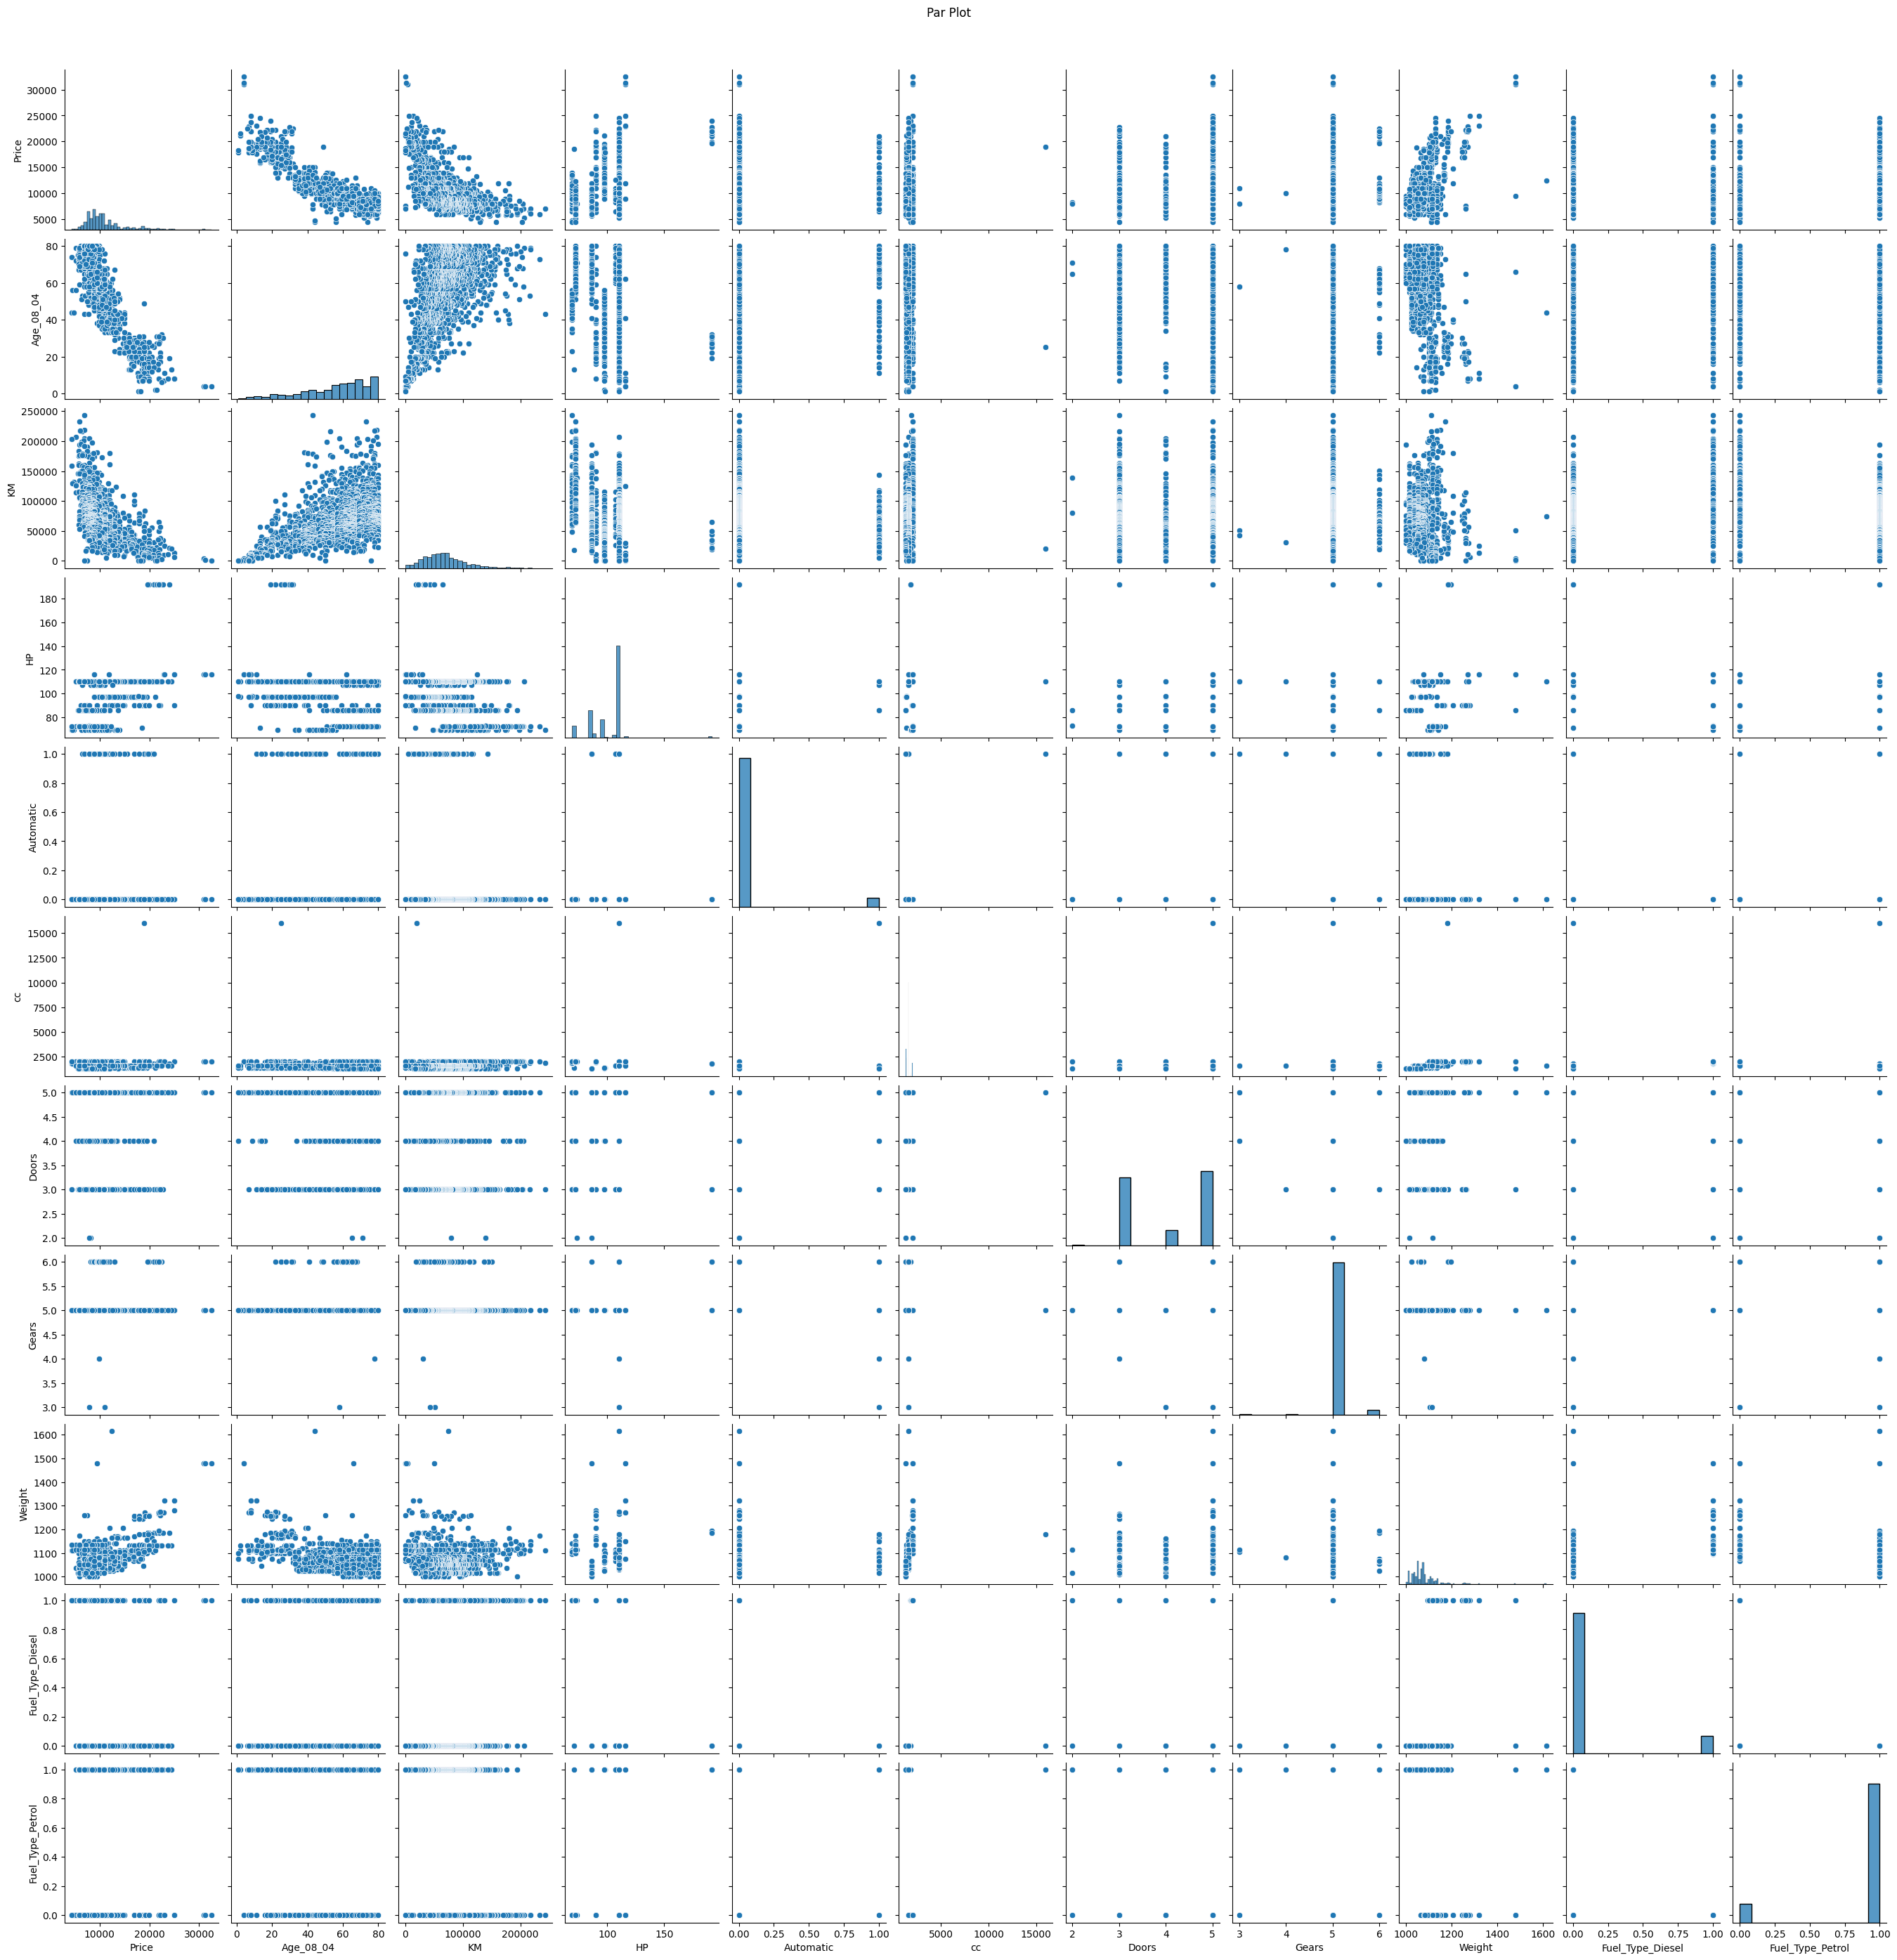

In [ ]:
sns.pairplot(cars)
plt.suptitle('Par Plot', y=1.02)

Scatter Plots: Each scatter plot allows you to examine the relationship between two variables. For instance, you can see how Price relates to Age_08_04, KM, HP, and other variables.

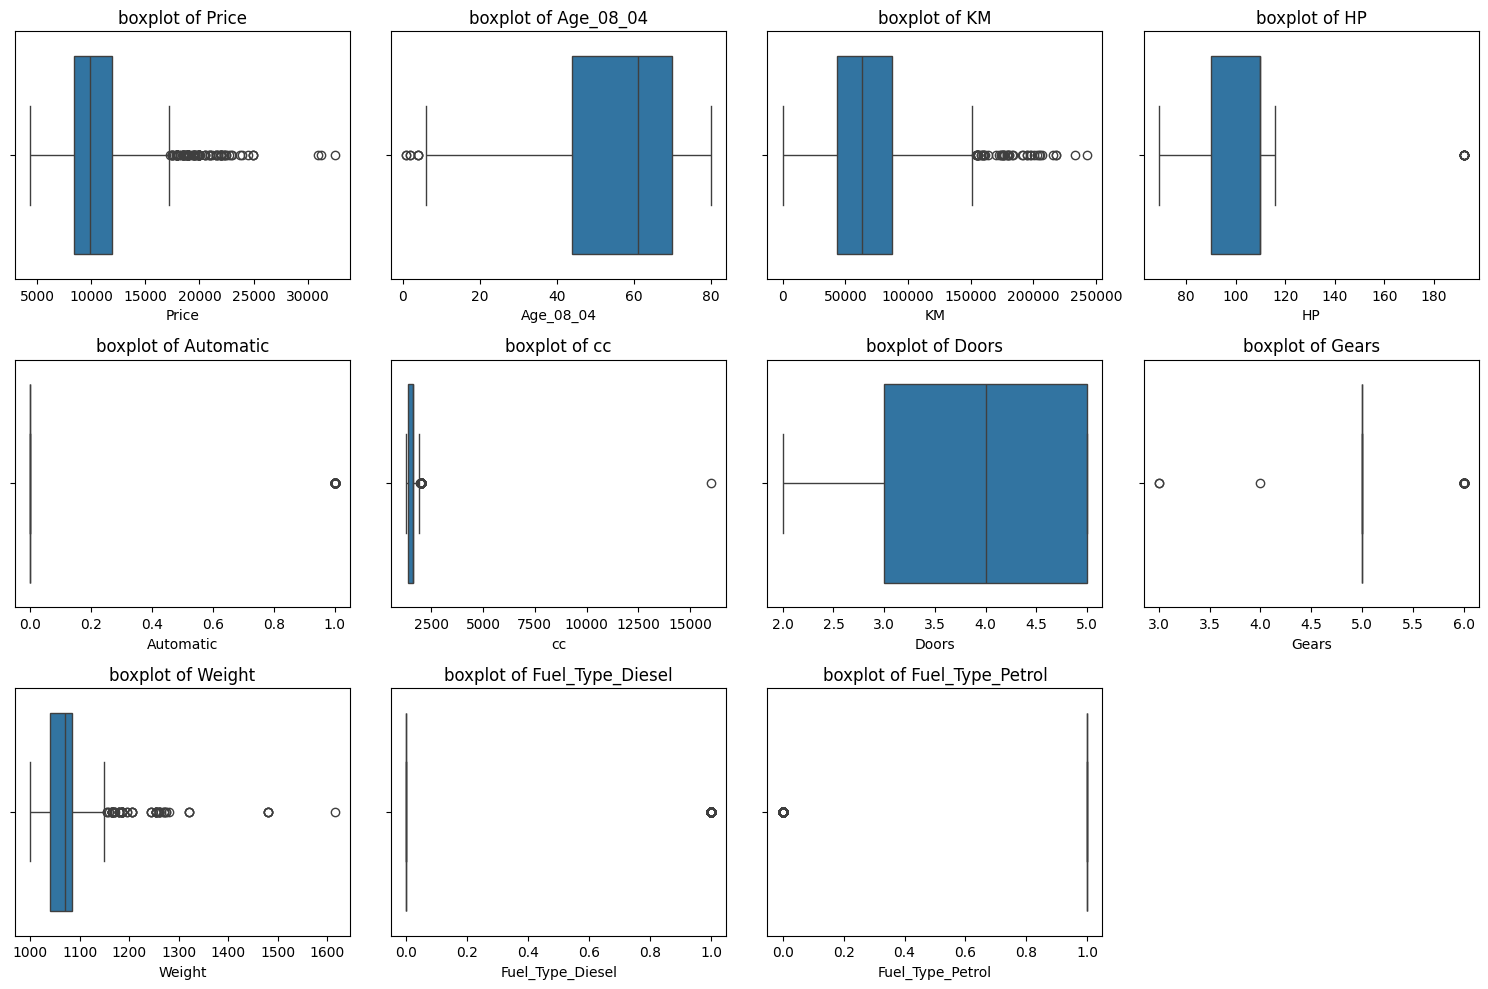

In [ ]:
plt.figure(figsize=(15,10))
total_plot = len(columns)
rows=(total_plot//4)+1

for i, col in enumerate(columns):
  plt.subplot(rows, 4, i+1)
  sns.boxplot(x=cars[col])
  plt.title(f'boxplot of {col}')

plt.tight_layout()
plt.show()

Price: Displays the spread and central tendency of car prices. Outliers might indicate unusually priced cars.

Age_08_04: Shows the distribution of car ages in months.

KM: Visualizes the range of kilometers driven by the cars, highlighting potential outliers.

HP: Represents the distribution of horsepower among the cars.

Automatic: Indicates the distribution of cars with automatic transmission (binary variable).

cc: Shows the engine size in cubic centimeters.

Doors: Displays the number of doors in the cars.

Gears: Visualizes the distribution of the number of gears in the cars.

Weight: Indicates the weight distribution of the cars.

Fuel_Type_Diesel and Fuel_Type_Petrol: Show the distribution of fuel types (binary variables).

# Identifying And Handling Outliers

In [ ]:
numeric_columns=['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight']
cars_numeric=cars[numeric_columns].dropna()
z_score=np.abs(stats.zscore(cars_numeric))
outliers_z=(z_score>4.5).any(axis=1)
print("outliers detection at position (Adjusted z-score):", np.where(outliers_z))
filtered_cars_adjusted=cars_numeric[~outliers_z]
print(f'Number of samples before removing outliers: {cars.shape[0]}')
print(f'Number of samples after removing outliers: {filtered_cars_adjusted.shape[0]}')


outliers detection at position (Adjusted z-score): (array([   8,   10,   11,   12,   13,   14,   15,   16,   49,   53,   80,
        109,  110,  111,  112,  113,  138,  141,  186,  221,  330,  444,
        461,  586,  614,  618,  623,  643,  659,  661,  683,  691,  709,
        730,  741,  747,  753,  786,  801,  811,  827,  828,  835,  838,
        842,  846,  873,  913,  915,  920,  921,  939,  956,  960,  964,
        991, 1014, 1015, 1026, 1426]),)
Number of samples before removing outliers: 1436
Number of samples after removing outliers: 1376


identified and removed outliers from the dataset using an adjusted z-score threshold pf 4.5 the dataset is now 1376 down from 1436

#  Prepare and Fit the Regression Model

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.formula.api as smf


In [ ]:
model=smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Weight', data=cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1284.
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:15:52   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1428   BIC:                         2.482e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7116.7137   1318.946     -5.396      0.000   -9703.993   -4529.435
Age_08_04   -122.2345      2.616    -46.725      0.000    -127.366    -117.103
KM            -0.0199      0.001    -16.344      0.000      -0.022      -0.017
HP            28.4809      2.618     10.878      0.000      23.345      33.617
cc            -0.0881      0.090     -0.983      0.326      -0.264       0.088
Doors        -10.6794     40.005     -0.267      0.790     -89.155      67.796
Gears        620.4166    197.422      3.143      0.002     233.149    1007.684
Weight        18.8542      0.866     21.781      0.000      17.156      20.552
==============================================================================
Omnibus:                      206.192   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1656.639
Skew:                          -0.400   Prob(JB):                         0.00
Kurtosis:                       8.201   Cond. No.                     2.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model.params

,0
Intercept,-7116.713686
Age_08_04,-122.234520
KM,-0.019867
HP,28.480905
cc,-0.088120
Doors,-10.679443
Gears,620.416571
Weight,18.854232


# Calculating VIF

In [ ]:
rsq_age=smf.ols(' Age_08_04 ~  KM + HP + cc + Doors + Gears + Weight',data=cars).fit().rsquared
vif_age=1/(1-rsq_age)
rsq_km=smf.ols('KM ~ Age_08_04  + HP + cc + Doors +  Gears + Weight',data=cars).fit().rsquared
vif_km=1/(1-rsq_km)
rsq_hp=smf.ols('HP~ Age_08_04 + KM + cc + Doors +  Gears + Weight',data=cars).fit().rsquared
vif_hp=1/(1-rsq_hp)
rsq_cc=smf.ols('cc~ Age_08_04 + KM + HP + Doors + Gears + Weight',data=cars).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_doors=smf.ols('Doors~ Age_08_04 + KM + HP + cc +  Gears + Weight',data=cars).fit().rsquared
vif_doors=1/(1-rsq_doors)
rsq_gears=smf.ols('Gears~ Age_08_04 + KM + HP + cc + Doors + Weight',data=cars).fit().rsquared
vif_gears=1/(1-rsq_gears)
rsq_weight=smf.ols('Weight~ Age_08_04 + KM + HP + cc + Doors +  Gears',data=cars).fit().rsquared
vif_weight=1/(1-rsq_weight)

d1 = {'Variables':['Age_08_04', 'KM' , 'HP' , 'cc' , 'Doors' , 'Gears' , 'Weight'], 'VIF':[vif_age, vif_km, vif_hp, vif_cc, vif_doors, vif_gears, vif_weight]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age_08_04,1.874559
1,KM,1.645618
2,HP,1.218056
3,cc,1.146729
4,Doors,1.150044
5,Gears,1.096603
6,Weight,1.643962


Low VIF Values (< 5): All VIF values are well below the common threshold of 10, indicating that multicollinearity is not a concern in model.

# Residual Analysis:

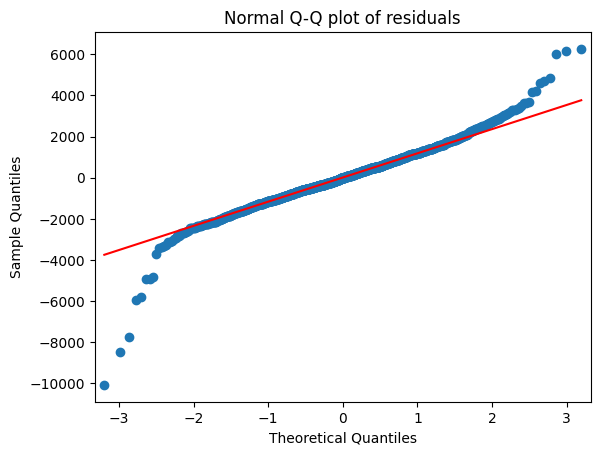

In [ ]:
qqplot=sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

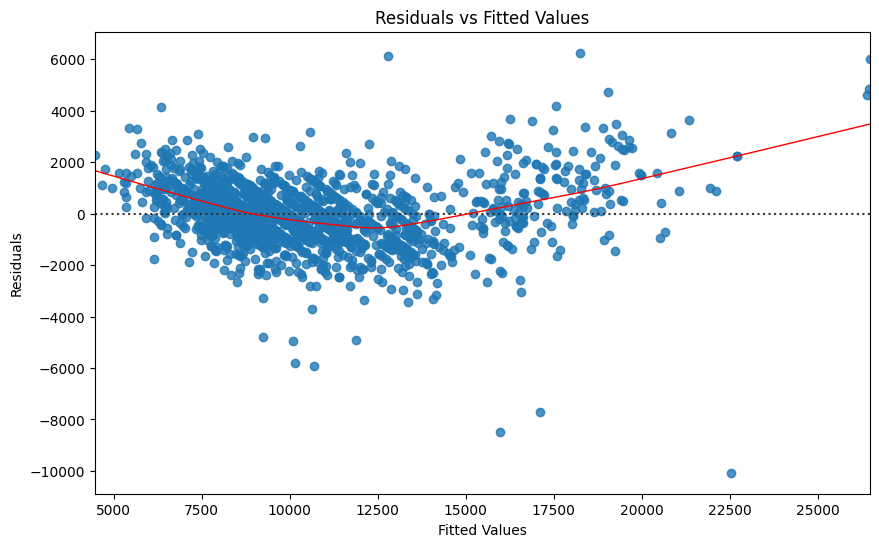

In [ ]:
plt.figure(figsize=(10,6))
sns.residplot(x=model.fittedvalues, y=model.resid,lowess=True, line_kws={'color':'red','lw':1})
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()




In [ ]:
def get_standardized_value(vals):
    return (vals - vals.mean()) / vals.std()


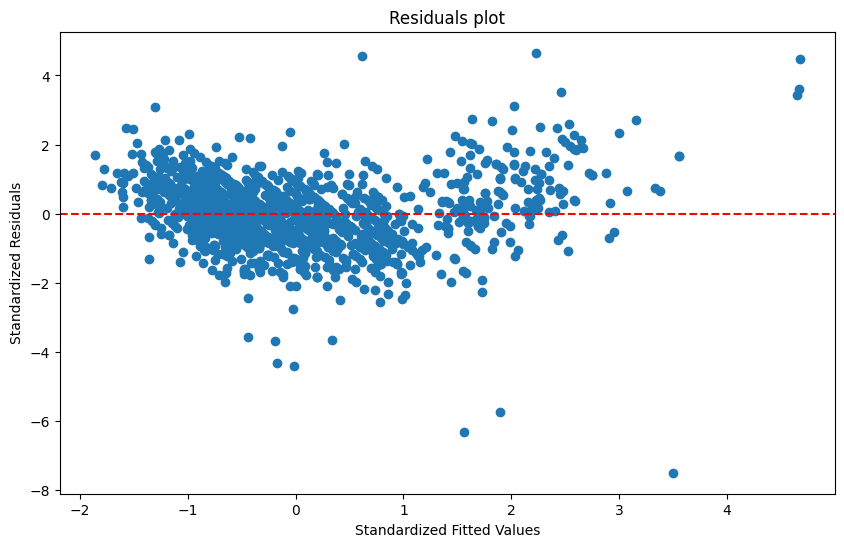

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(get_standardized_value(model.fittedvalues),
            get_standardized_value(model.resid))
plt.title('Residuals plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


# Spliting the Data as Train-Test

In [ ]:
from sklearn.model_selection import train_test_split

x=filtered_cars_adjusted.drop(columns=['Price'])
y=filtered_cars_adjusted['Price']

X_train, X_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1100, 7)
(276, 7)
(1100,)
(276,)


Here we divided the data successfuly the data is split into 80% traing and 20% testing data

# Preparing Multiple Models

Creating multiple models allows you to explore different approaches and compare their performance.
This helps u to increase Accuracy, Model Valadation

In [70]:
model_1=smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Weight', data=pd.concat([X_train, y_train], axis=1)).fit()

print(model_1.summary())
print("T-values",model_1.tvalues)
print("P-values",model_1.pvalues)
print("R sqare",model_1.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1164.
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:53:17   Log-Likelihood:                -9412.9
No. Observations:                1100   AIC:                         1.884e+04
Df Residuals:                    1093   BIC:                         1.887e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -356.0016     59.646     -5.969      0.0

In [71]:
model_2=smf.ols('Price ~ np.power(Age_08_04, 2) + KM + np.power(HP, 2) + cc + Doors + Gears + np.power(Weight, 2)', data=pd.concat([X_train, y_train], axis=1)).fit()

print(model_2.summary())
print("T-values",model_2.tvalues)
print("P-values",model_2.pvalues)
print("R sqare",model_2.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     871.9
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:55:28   Log-Likelihood:                -9547.4
No. Observations:                1100   AIC:                         1.911e+04
Df Residuals:                    1093   BIC:                         1.914e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 35

In [72]:

model_3 = smf.ols('Price ~ Age_08_04 * KM + HP * Weight + cc + Doors + Gears', data=pd.concat([X_train, y_train], axis=1)).fit()

print(model_3.summary())
print("T-values:", model_3.tvalues)
print("P-values:", model_3.pvalues)
print("R-squared:", model_3.rsquared)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     992.9
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:56:09   Log-Likelihood:                -9350.2
No. Observations:                1100   AIC:                         1.872e+04
Df Residuals:                    1091   BIC:                         1.876e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2115.8270    427.941      4.944   

# Lasso Regression

In [67]:
from sklearn.linear_model import Lasso

X_train_interaction=sm.add_constant(X_train)
X_test_interaction=sm.add_constant(X_test)

lasso_model=Lasso(alpha=1.0).fit(X_train_interaction,y_train)
y_pred_lasso=lasso_model.predict(X_test_interaction)

mae_lasso=mean_absolute_error(y_test, y_pred_lasso)
mse_lasso=mean_squared_error(y_test, y_pred_lasso)
rmse_lasso=np.sqrt(mse_lasso)

print(f'Lasso Regression - MAE: {mae_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}')

Lasso Regression - MAE: 854.563299722641, MSE: 1210387.7910262868, RMSE: 1100.1762545275583


# Ridge Regression

In [69]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0).fit(X_train_interaction, y_train)
y_pred_ridge = ridge.predict(X_test_interaction)


mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print(f'Ridge - MAE: {mae_ridge}, MSE: {mse_ridge}, RMSE: {rmse_ridge}')


Ridge - MAE: 854.6120065970149, MSE: 1210498.1204857666, RMSE: 1100.2263951050104


# Final model

In [73]:
y_pred_3=model_3.predict(X_test)

predicted_vs_actual=pd.DataFrame({'Predicted':y_pred_3, 'Actual':y_test})
predicted_vs_actual.head()

,Predicted,Actual
526,11285.081553,11450
77,16583.730482,18450
889,9931.905471,8900
673,7981.314299,9250
260,11658.403898,11950


In [92]:
model_3 = smf.ols('Price ~ Age_08_04 * KM + HP * Weight + cc + Doors + Gears', data=pd.concat([X_train, y_train], axis=1)).fit()

y_pred_3 = model_3.predict(X_test)

r_squared=model_3.rsquared
adj_r_squared=model_3.rsquared_adj
print("R-squared:", r_squared*100)
print("Adjusted R-squared:", adj_r_squared*100)


R-squared: 87.92381965008875
Adjusted R-squared: 87.83526837346245


In [93]:
cars['Price']

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [94]:
y_pred_3

,0
526,11285.081553
77,16583.730482
889,9931.905471
673,7981.314299
260,11658.403898
...,...
1143,9120.712509
1161,7895.566887
323,11957.690793
505,11171.764611


**Actual vs Predicted Prices (Test Set)**

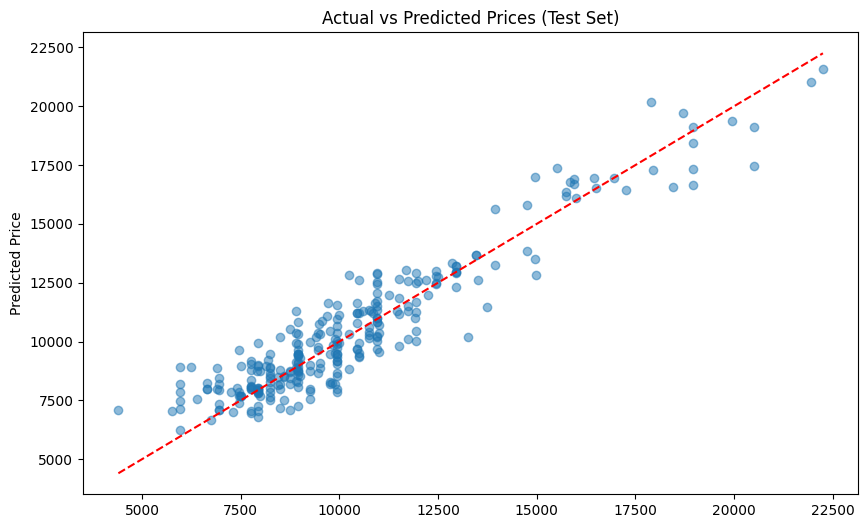

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_3, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Test Set)')
plt.show()


**Actual vs Predicted Prices(Training Set)**

In [82]:
y_train_pred = model_3.predict(X_train)

predicted_vs_actual_train = pd.DataFrame({
    'Actual Price': y_train,
    'Predicted Price': y_train_pred
})

print(predicted_vs_actual_train.head())


      Actual Price  Predicted Price
555          11250     11493.500310
263          12750     12910.504688
391           8250      9100.406835
1275          7250      7515.587747
859           8750      9212.625666


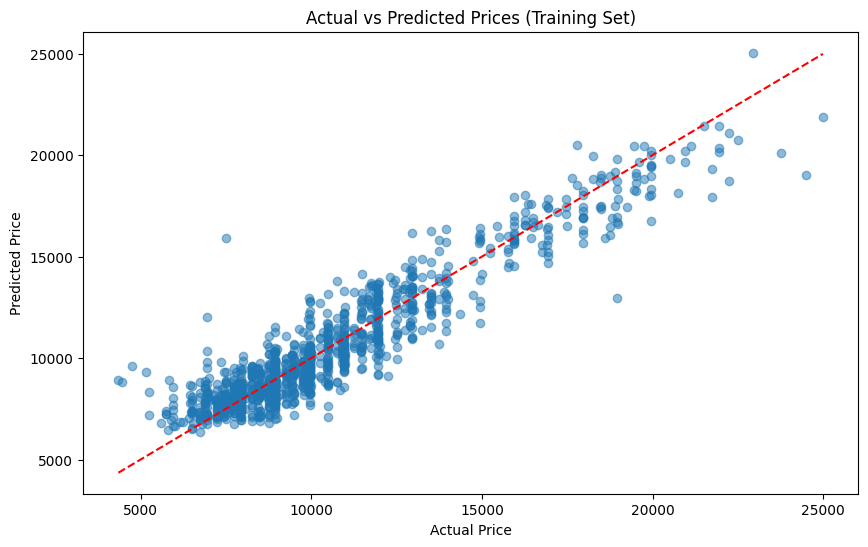

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(predicted_vs_actual_train['Actual Price'], predicted_vs_actual_train['Predicted Price'], alpha=0.5)
plt.plot([min(predicted_vs_actual_train['Actual Price']), max(predicted_vs_actual_train['Actual Price'])],
         [min(predicted_vs_actual_train['Actual Price']), max(predicted_vs_actual_train['Actual Price'])], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Training Set)')
plt.show()


In [84]:
y_train_pred

,0
555,11493.500310
263,12910.504688
391,9100.406835
1275,7515.587747
859,9212.625666
...,...
1154,7330.621819
1189,7200.840332
1353,9351.938488
907,9302.959818


# Prediction Data

Orignal data

In [88]:
cars['Price']

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


Prediction Data for test set

In [86]:
y_pred_3

,0
526,11285.081553
77,16583.730482
889,9931.905471
673,7981.314299
260,11658.403898
...,...
1143,9120.712509
1161,7895.566887
323,11957.690793
505,11171.764611


Prediction Data for Trained set

In [87]:
y_train_pred

,0
555,11493.500310
263,12910.504688
391,9100.406835
1275,7515.587747
859,9212.625666
...,...
1154,7330.621819
1189,7200.840332
1353,9351.938488
907,9302.959818


# Interview Questions:

**What techniques can be used to address multicollinearity in multiple linear regression?**


Variance Inflation Factor (VIF): VIF measures how much the variance of an estimated regression coefficient increases due to collinearity with other predictors. A high VIF indicates a high level of multicollinearity.

Correlation Matrix: This matrix displays the correlation coefficients between pairs of variables. High correlation coefficients (close to ±1) between predictors suggest multicollinearity

Ridge Regression: This technique adds a penalty to the loss function proportional to the sum of the squared coefficients. By shrinking the coefficients, it helps to mitigate the effects of multicollinearity while still keeping all the predictors in the model.

Principal Component Analysis (PCA): PCA transforms the original correlated variables into a new set of uncorrelated variables called principal components. These components can then be used in regression analysis, effectively reducing multicollinearity


**What is Normalization & Standardization and how is it helpful?**

**Normalization** is a scaling techniques which values are shifted and rescaled so that they end up in range  b/w 0&1 it is know as min-max scaling lies b/w 0 to 1

**Standardization** is a scaling technique where the value are concentrated around the mean with a unit std values lies b/w -3 to 3
